# Chess Tournament Analysis (CTA)
## Descripción
En este proyecto se busca hacer un analisis del torneo de Barcelona en especifico para luego poder escalarlo a otros torneos de ajedrez. Se busca analizar los datos de los jugadores, partidas y torneos para poder hacer un analisis de los jugadores y sus partidas.

## Objetivos
- Analizar los datos de los jugadores, partidas y torneos
- Realizar un analisis de los jugadores y sus partidas
- Realizar un analisis del torneo
- Analizar la evaluación del motor de ajedrez
- Analizar los movimientos más comunes
- Analizar las estrategias más comunes

## Datos
Los datos se encuentran en la carpeta `data` y se dividen en 3 archivos:
- `players.csv`: Contiene los datos de los jugadores
- `details.csv`: Contiene los datos de las partidas y la apertura realizada
- `moves.csv`: Contiene los datos de los movimientos, evaluación y tiempo de los movimientos
- `openings.csv`: Contiene los datos de las aperturas de ajedrez, el código de la apertura y el nombre de la apertura

## Estudios a realizar
- Rendimiento del jugador : Como se comporta el jugador en el torneo
- Efecto de la apertura en el resultado : Hay alguna apertura que sea mejor que otra para llegar a un mejor resultado
- Evaluación del motor de ajedrez : Como se comporta el motor de ajedrez en comparación con los jugadores profesionales
- Impacto del tiempo en el rendimiento : Cuanto influye el tiempo en el rendimiento del jugador
- Relación entre ELO y resultado : Existe una relación entre el ELO del jugador y el resultado obtenido
- Diferencia entre blancas y negras : Influencia de jugar con blancas o negras en el resultado


## Estudio de los datos
### Carga de los datos
Primero se cargan los datos de los jugadores, partidas, movimientos y aperturas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Cargar los datos
details_df = pd.read_csv("../data/details.csv")  
moves_df = pd.read_csv("../data/moves.csv") 
openings_df = pd.read_csv("../data/openings.csv")  
players_df = pd.read_csv("../data/players.csv")  

Segundo, se unen las tablas de jugadores con los detalles

In [18]:
# Unir detalles con jugadores
details_df = details_df.merge(players_df, left_on="White", right_on="FideId", suffixes=("_white", "_player"))
details_df = details_df.merge(players_df, left_on="Black", right_on="FideId", suffixes=("", "_black"))

# Renombrar columnas para claridad
details_df = details_df.rename(columns={"Name": "White_Player", "Name_black": "Black_Player", "Elo": "White_Elo", "Elo_black": "Black_Elo"})

# Unir con las aperturas
details_df = details_df.merge(openings_df, on="ECO", how="left")

### Gráficas básicas
#### 1. Rendimiento de los jugadores

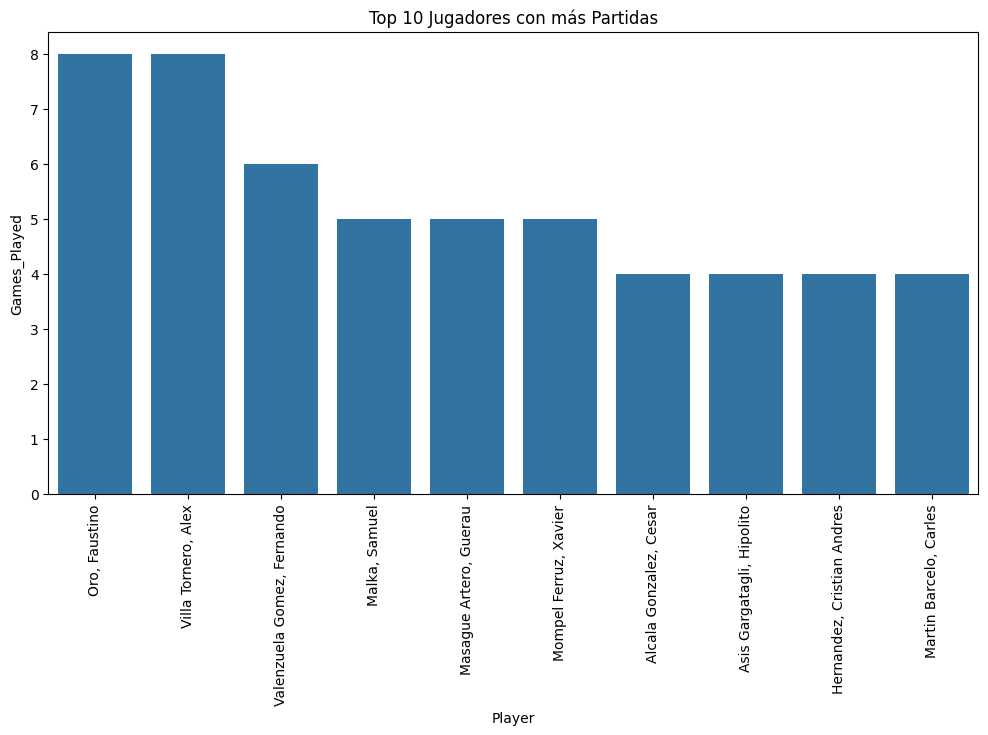

In [6]:
def player_performance():
    player_results = details_df.groupby("White_Player")["White_Elo"].count().reset_index()
    player_results.columns = ["Player", "Games_Played"]
    plt.figure(figsize=(12, 6))
    sns.barplot(data=player_results.sort_values("Games_Played", ascending=False).head(10), x="Player", y="Games_Played")
    plt.xticks(rotation=90)
    plt.title("Top 10 Jugadores con más Partidas")
    plt.show()

player_performance()

#### 2. Efecto de la apertura en el resultado

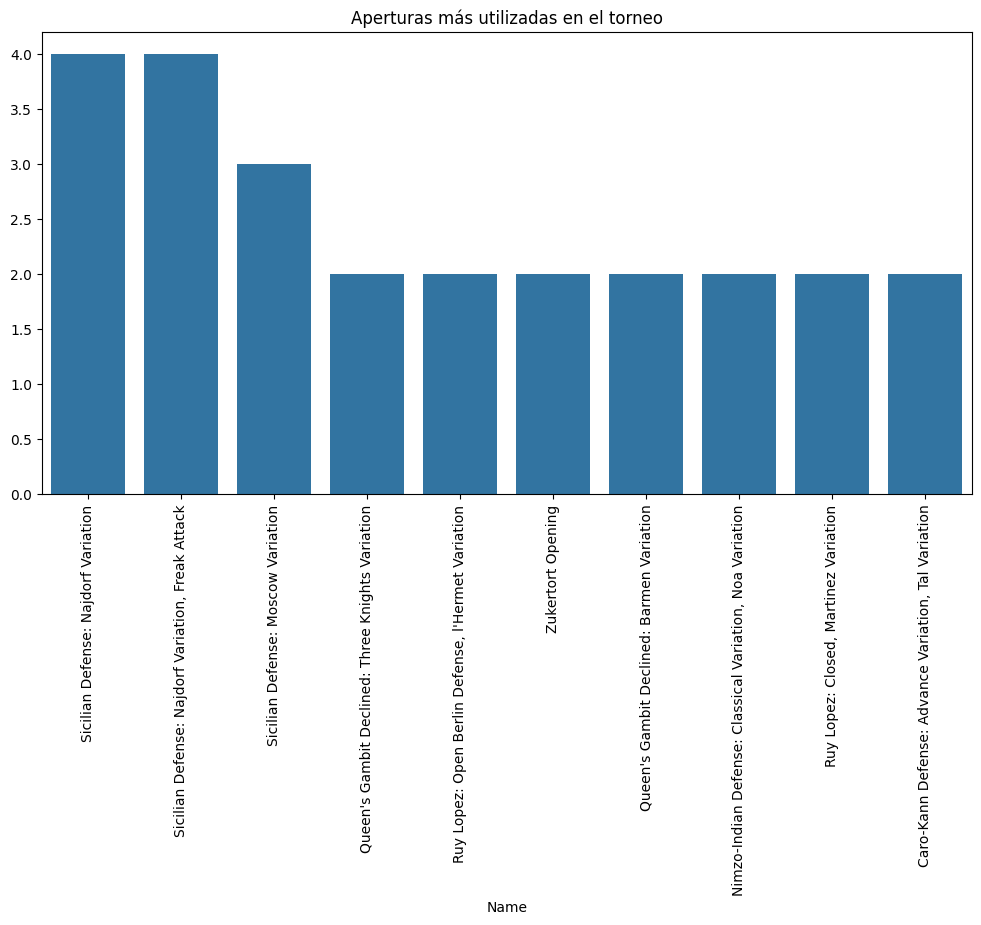

In [7]:
def opening_effect():
    opening_counts = details_df["Name"].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=opening_counts.index, y=opening_counts.values)
    plt.xticks(rotation=90)
    plt.title("Aperturas más utilizadas en el torneo")
    plt.show()

opening_effect()

#### 3. Evaluación del motor de ajedrez

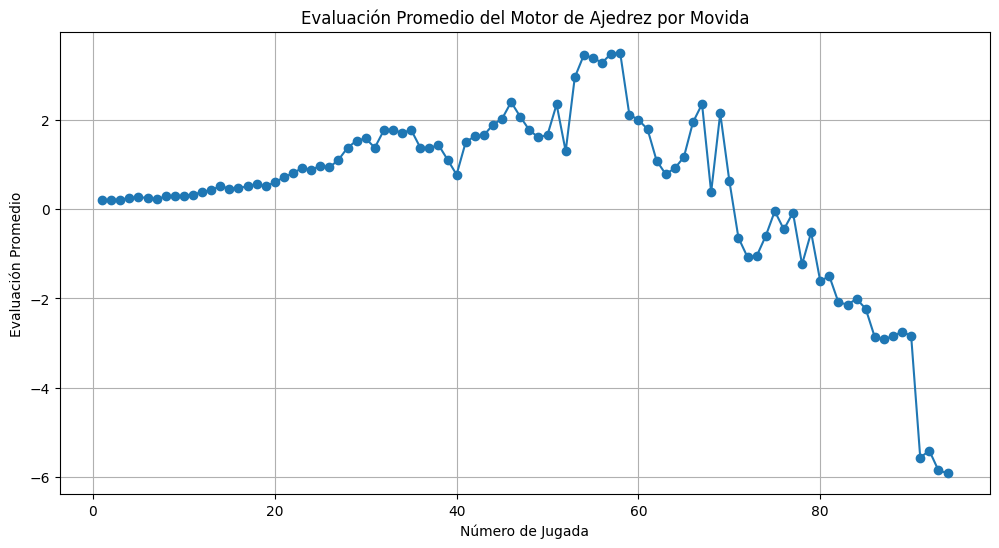

In [8]:
def engine_evaluation():
    avg_eval = moves_df.groupby("Move Number")["Evaluation"].mean()
    plt.figure(figsize=(12, 6))
    plt.plot(avg_eval.index, avg_eval.values, marker='o')
    plt.title("Evaluación Promedio del Motor de Ajedrez por Movida")
    plt.xlabel("Número de Jugada")
    plt.ylabel("Evaluación Promedio")
    plt.grid()
    plt.show()

engine_evaluation()

#### 4. Impacto del tiempo en el rendimiento

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18516\2708715209.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moves_df_clean['Time (seconds)'] = pd.to_numeric(moves_df_clean['Time (seconds)'], errors='coerce')


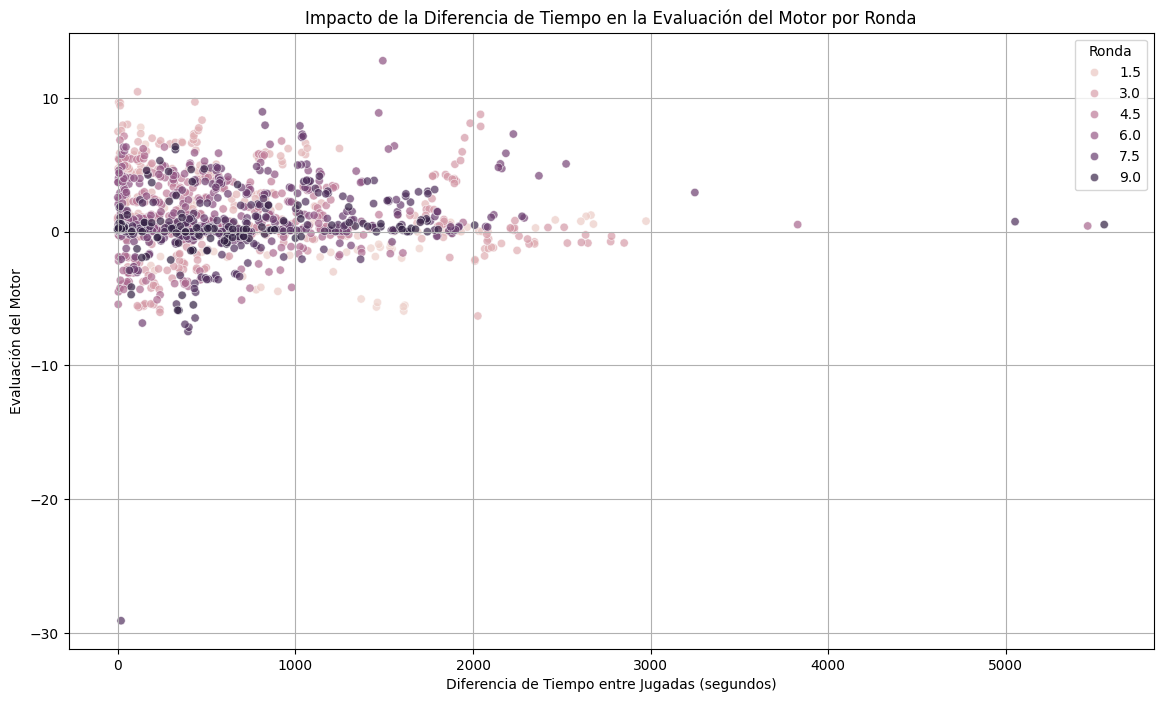

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar el impacto de la diferencia de tiempo en la evaluación
def time_impact(moves_df):
    # Asegurarnos de que 'Time (seconds)' y 'Evaluation' no tengan valores nulos o incorrectos
    moves_df_clean = moves_df.dropna(subset=["Time (seconds)", "Evaluation"])

    # Convertir los valores de tiempo a segundos (si no están ya en ese formato)
    moves_df_clean['Time (seconds)'] = pd.to_numeric(moves_df_clean['Time (seconds)'], errors='coerce')

    # Filtrar solo los valores positivos de tiempo
    moves_df_clean = moves_df_clean[moves_df_clean['Time (seconds)'] >= 0]

    # Ordenar los datos por 'Round' y 'Move Number' para asegurar que estén en el orden correcto
    moves_df_sorted = moves_df_clean.sort_values(by=['Round', 'Move Number'])

    # Calcular la diferencia de tiempo entre jugada y jugada en la misma partida (usando 'Round' como identificador de partida)
    moves_df_sorted['Time Difference'] = moves_df_sorted.groupby('Round')['Time (seconds)'].diff().fillna(0)

    # Eliminar las diferencias negativas (si alguna se coló)
    moves_df_sorted = moves_df_sorted[moves_df_sorted['Time Difference'] >= 0]

    # Graficar la diferencia de tiempo en función de la evaluación
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=moves_df_sorted, x="Time Difference", y="Evaluation", hue="Round", alpha=0.7)

    # Personalizar el gráfico
    plt.title("Impacto de la Diferencia de Tiempo en la Evaluación del Motor por Ronda")
    plt.xlabel("Diferencia de Tiempo entre Jugadas (segundos)")
    plt.ylabel("Evaluación del Motor")
    plt.grid(True)
    plt.legend(title="Ronda")
    plt.show()

time_impact(moves_df)


No necesariamente tiempo más largo = mejor evaluación: A pesar de que se podría esperar que un mayor tiempo de reflexión lleve a decisiones más acertadas (evaluación positiva), no siempre parece ser el caso. La dispersión en el gráfico indica que la relación entre el tiempo disponible y la calidad de las decisiones (evaluación del motor) no es tan sencilla.



#### 5. Relación entre ELO y jugar con blancas o negras

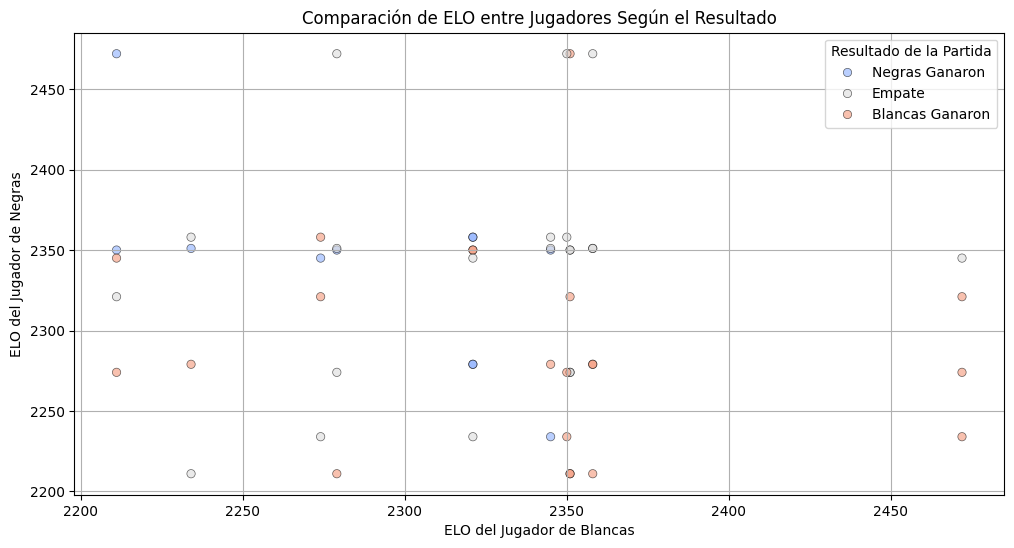

In [19]:
# Función para graficar la relación entre el ELO y el resultado de la partida
def elo_vs_result():
    # Asegurarse de que el resultado no esté vacío
    details_df_clean = details_df.dropna(subset=["Result"])

    # Mapear los resultados a valores para facilitar la visualización
    details_df_clean['Result'] = details_df_clean['Result'].map({'1-0': 'Blancas Ganaron', '0-1': 'Negras Ganaron', '1/2-1/2': 'Empate'})

    # Seleccionar las columnas necesarias para la visualización
    details_df_clean = details_df_clean[['White_Elo', 'Black_Elo', 'Result']]

    # Crear la figura para el gráfico
    plt.figure(figsize=(12, 6))

    # Graficar el ELO de las blancas vs el ELO de las negras
    sns.scatterplot(data=details_df_clean, x="White_Elo", y="Black_Elo", hue="Result", palette="coolwarm", alpha=0.6, 
                    edgecolor="black", linewidth=0.5)

    # Títulos y etiquetas
    plt.title("Comparación de ELO entre Jugadores Según el Resultado")
    plt.xlabel("ELO del Jugador de Blancas")
    plt.ylabel("ELO del Jugador de Negras")
    plt.legend(title="Resultado de la Partida")
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()

# Llamar a la función para generar la gráfica
elo_vs_result()

La gráfica muestra que, en general, las blancas tienen más victorias que las negras, especialmente entre los jugadores con ELO más alto. Aunque el ELO de ambos jugadores está bastante equilibrado, la ventaja de jugar con blancas parece notarse más en los niveles más altos de habilidad, sugiriendo que las blancas podrían tener una ligera ventaja estratégica.

#### 6. Diferencia entre blancas y negras

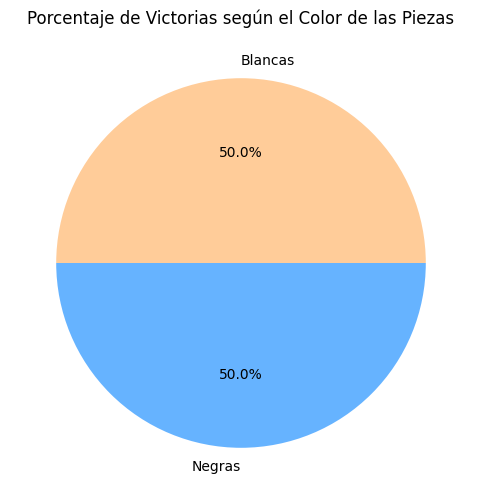

In [11]:
def color_advantage():
    white_wins = details_df["White_Elo"].count()
    black_wins = details_df["Black_Elo"].count()
    plt.figure(figsize=(6, 6))
    plt.pie([white_wins, black_wins], labels=["Blancas", "Negras"], autopct="%.1f%%", colors=["#ffcc99", "#66b3ff"])
    plt.title("Porcentaje de Victorias según el Color de las Piezas")
    plt.show()

color_advantage()